In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
STORAGE_PATH = "../../persisted_data/feather/{}.feather"

def load_data_set(name):
    data = pd.read_feather(STORAGE_PATH.format(name))
    return data

In [3]:
file_mask = "{}_10spy_1shift_normalized"
countries = ["spain", "brazil", "australia", "canada", "ireland", "usa", "germany", "latvia", "france", "denmark", 
             "isreal", "iceland", "switzerland", "finland", "southkorea", "mexiko", "hongkong", "argentina", 
             "italy", "russia", "thailand", "china", "lithuania", "turkey", "taiwan", "austria", "portugal", 
             "india", "greece", "estonia", "singapore", "norway", "newzealand", "belgium", "qatar", "sweden", 
             "uk", "malaysia", "venezuela", "indonesia", "netherlands"]

country_sets = {country : load_data_set(file_mask.format(country)) for country in countries}

In [4]:
# include the trading strategies
%run trading_strategies.ipynb

In [5]:
all_strategies = {**regulating_speculator_strategies, **volatility_reducer_strategies, **trend_follower_strategies, 
                  **rsi_strategies, **ema_strategies, **svm_strategies, **net_strategies}

# Randomized portfolio performance
The visualization of the trading performance gives an intuitive understanding of the trading strategies, but does not give clear information about the actual performance for large sample sets.
By taking the data sets and evaluating the decision of the trading strategies, the probability density distribution of the future price before and after applying the trading decisions can be compared


In [7]:
def calculate_portfolio_performance(data_set, trading_rule, drop_ones=True):
    # calculate the positions according to the trading rule
    positions = trading_rule(data_set)
    if len(positions.shape) > 1:
        positions = positions[:, 0]

    # the referance is the future price of the samples
    original = data_set["future_price"].values
    # calculate the performance for the samples chosen by the trading rule
    trading = 1 + (original - 1) * positions
    if drop_ones:
        # ignore the samples where the position is 0
        trading = trading[positions != 0]
        
    return original, trading, positions

In [6]:
# simple function used to plot a distribution of values using a histogram
def plot_distribution(y_values, xlabel="future price in relation to current price", ylabel="density", range=[-3,3]):
    size = len(y_values)
    n_bins = min(int(size / 10), 100)
    plt.figure(figsize=(10, 5))
    plt.hist(y_values, bins=n_bins, range=range, density=True)
    sns.kdeplot(y_values, clip=range)
    plt.axvline(y_values.mean(), color="red", linestyle="dashed")
    plt.tight_layout()
    plt.title("Probability density distribution plot with sample size {}".format(size))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [8]:
def plot_performances(original, trading, positions):
    plot_distribution(np.log(original), range=[-1, 1])
    print("Original, active days: {}, leverage: {}, log mean: {}, std: {}".format(len(original), 1, np.mean(np.log(original)), np.std(np.log(original))))
    plot_distribution(np.log(trading), range=[-1, 1])
    print("Trading, active days: {}, leverage: {}, log mean: {}, std: {}".format(len(trading), np.mean(positions),np.mean(np.log(trading)), np.std(np.log(trading))))

In [9]:
def calculate_performances(data_sets, trading_rule):
    performances = {}
    for name, data_set in data_sets.items():
        # calculate the performance
        original, trading, _ = calculate_portfolio_performance(data_set, trading_rule)
        performances[name] = np.mean(trading) - np.mean(original)
    return performances

In [41]:
def performance_bar_chart(performance, name, limit=0.02):
    plt.figure(figsize=(15,10))
    plt.bar(performance.keys(), performance.values())
    ax = plt.gca()
    #x.set_ylim([-limit, limit])
    plt.xticks(rotation='vertical')
    plt.title("Excess returns created by the trading strategy {} in various stock markets".format(name))
    plt.xlabel("countries")
    plt.ylabel("Average excess returns")
    plt.show()

# Plots

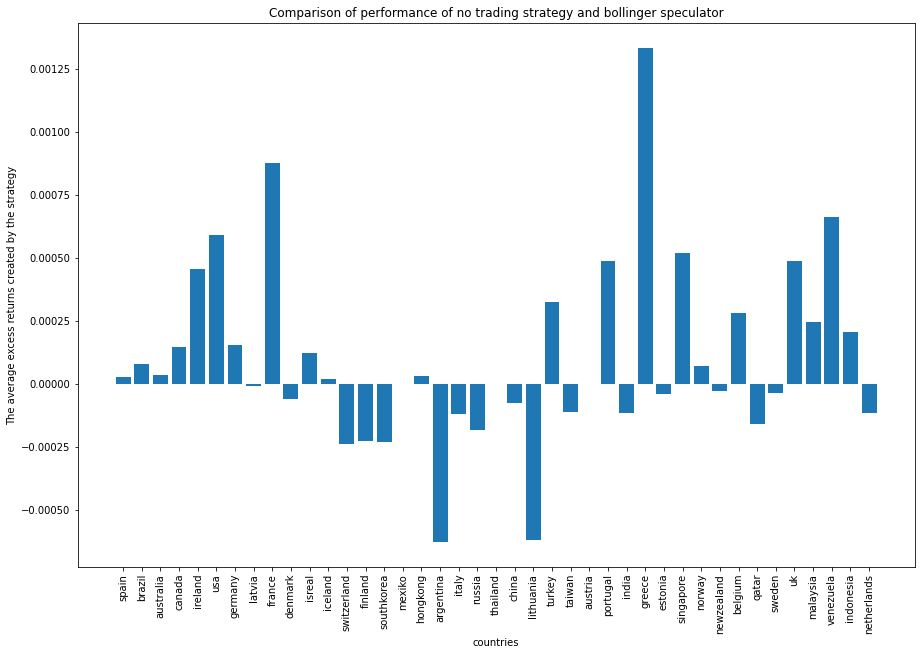

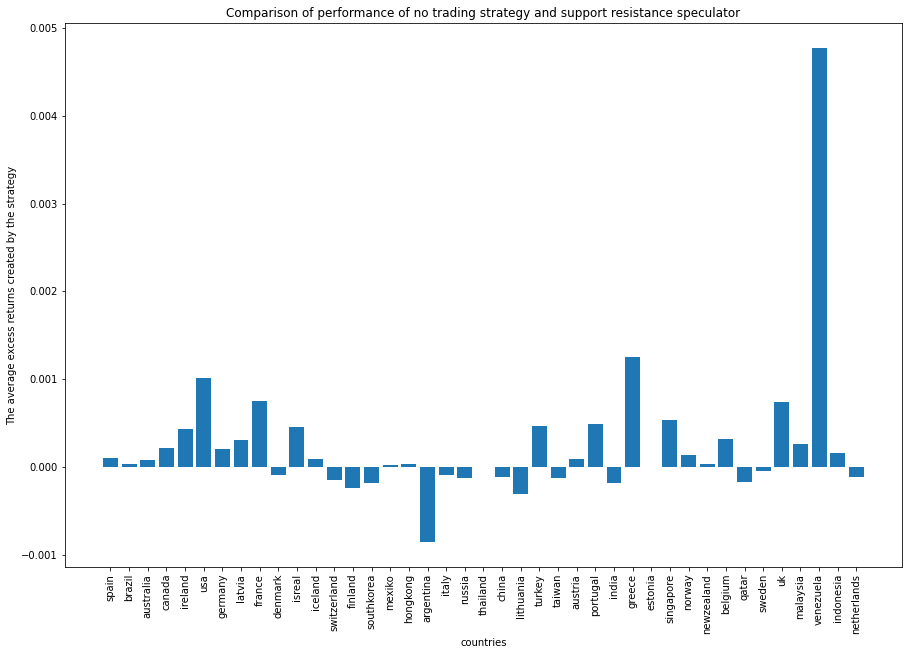

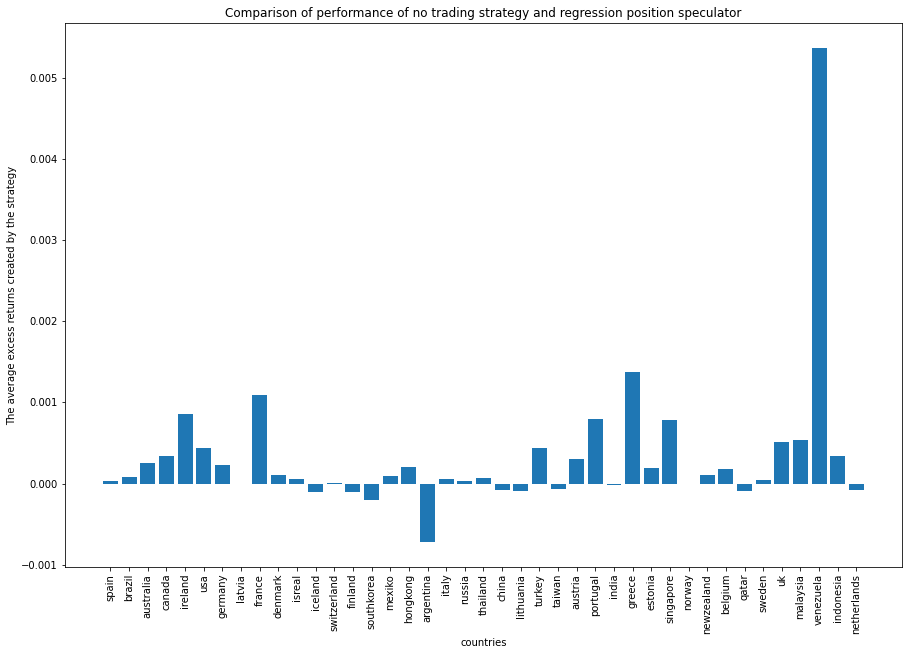

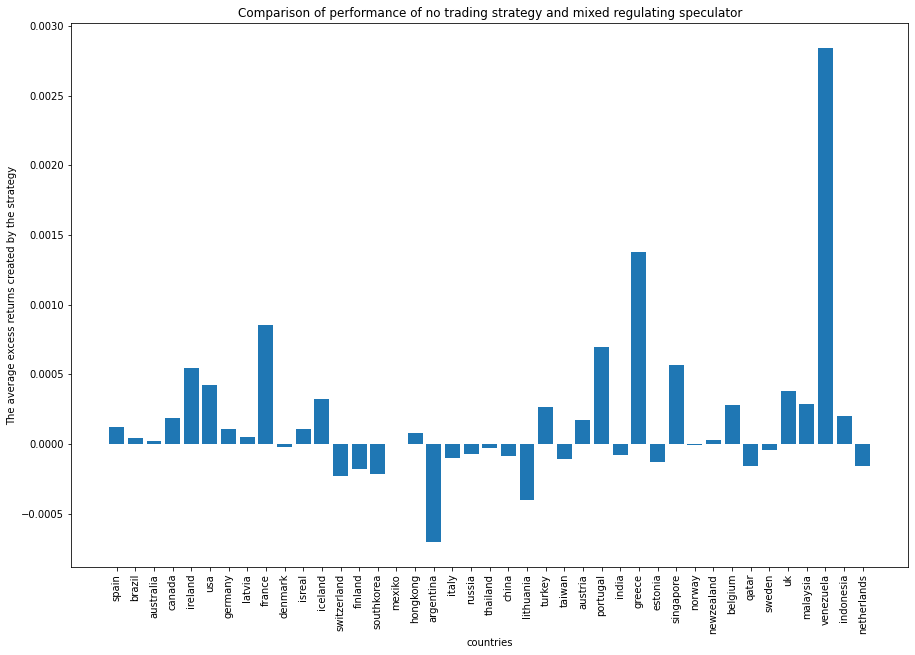

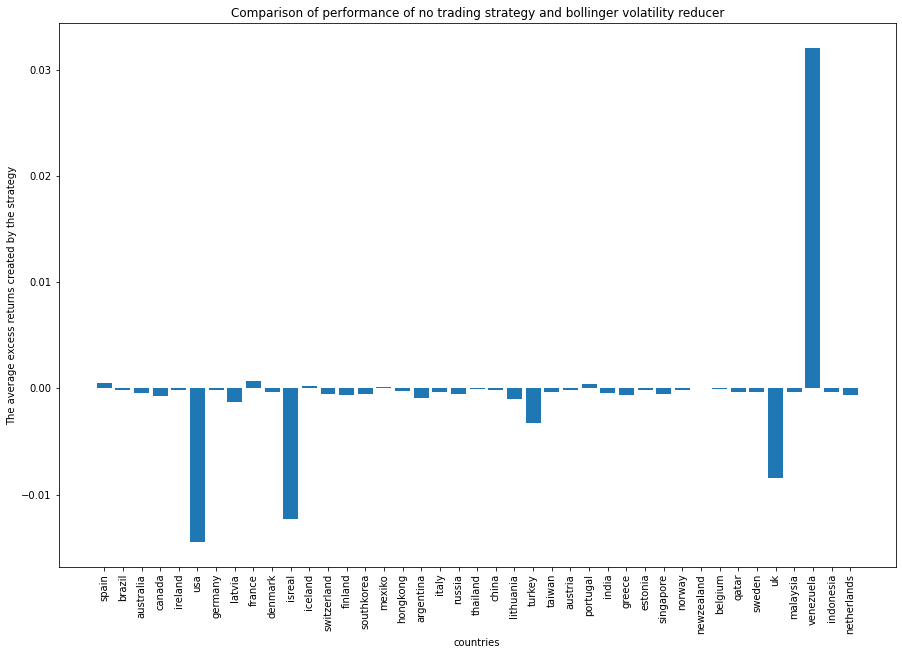

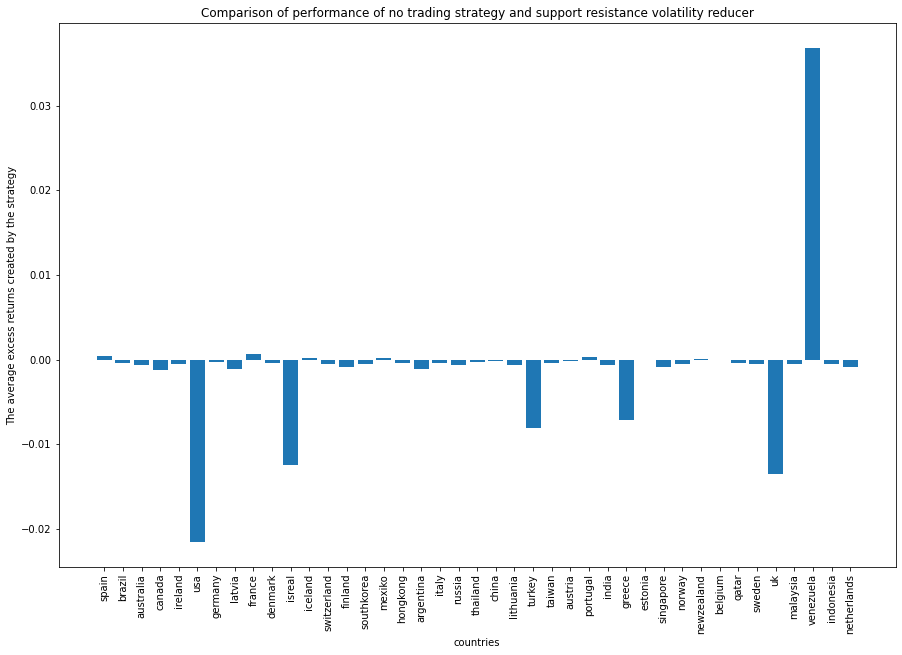

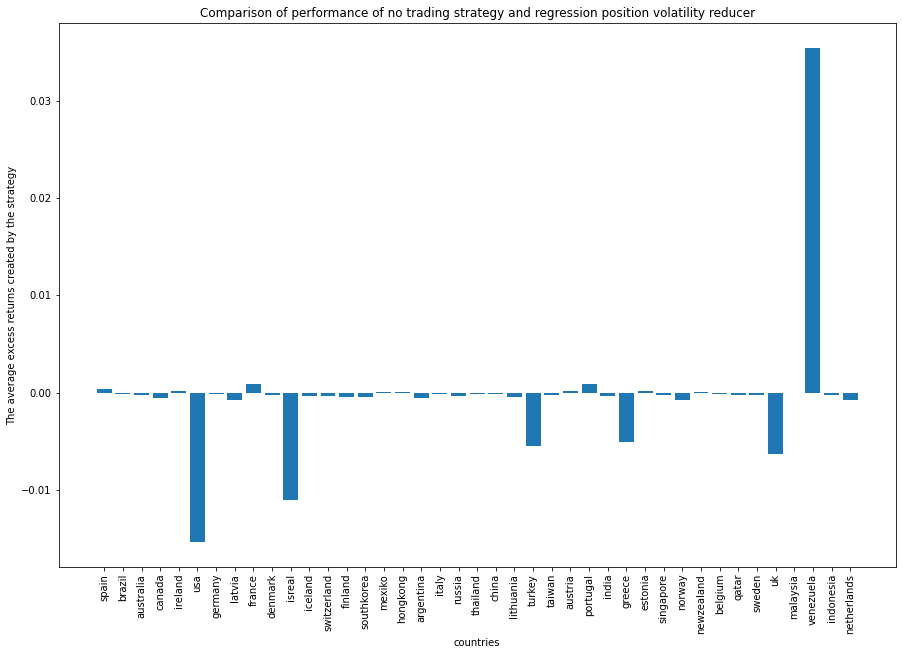

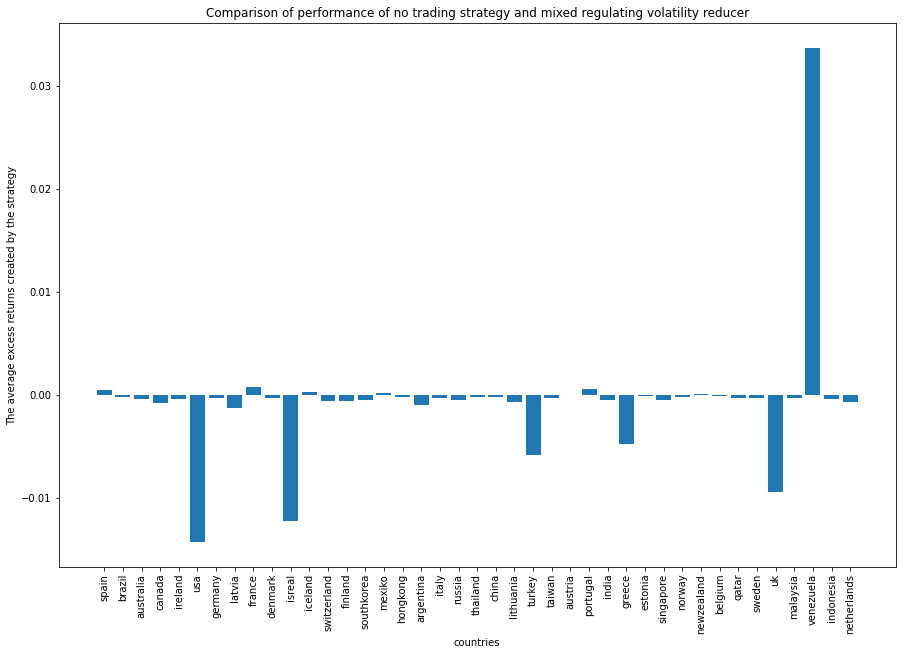

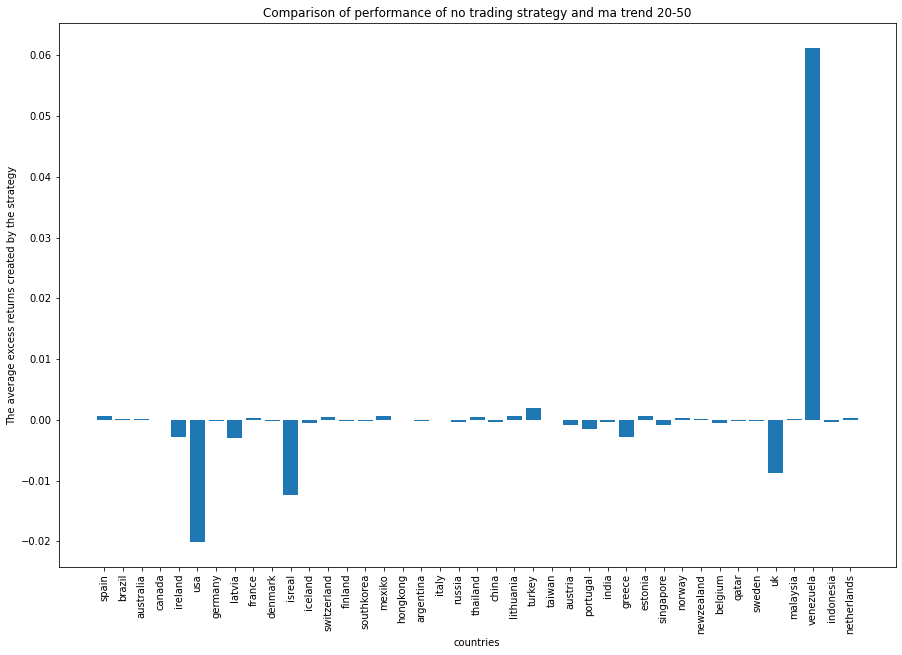

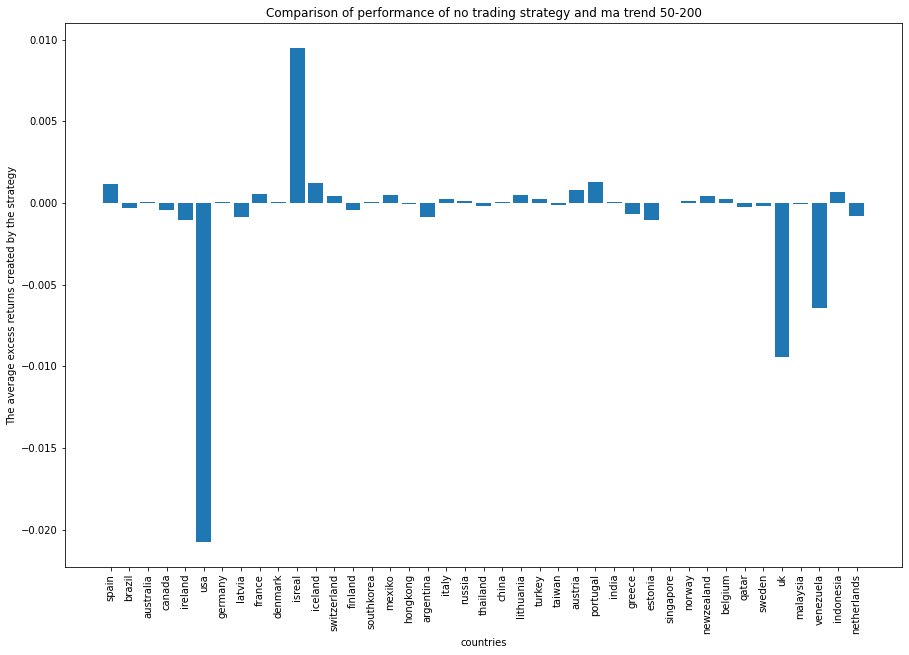

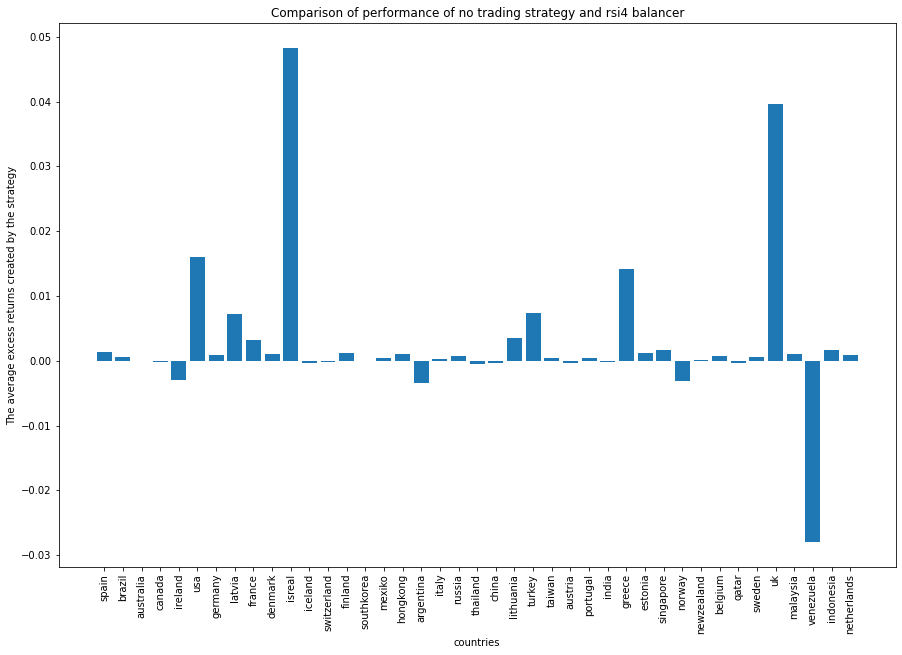

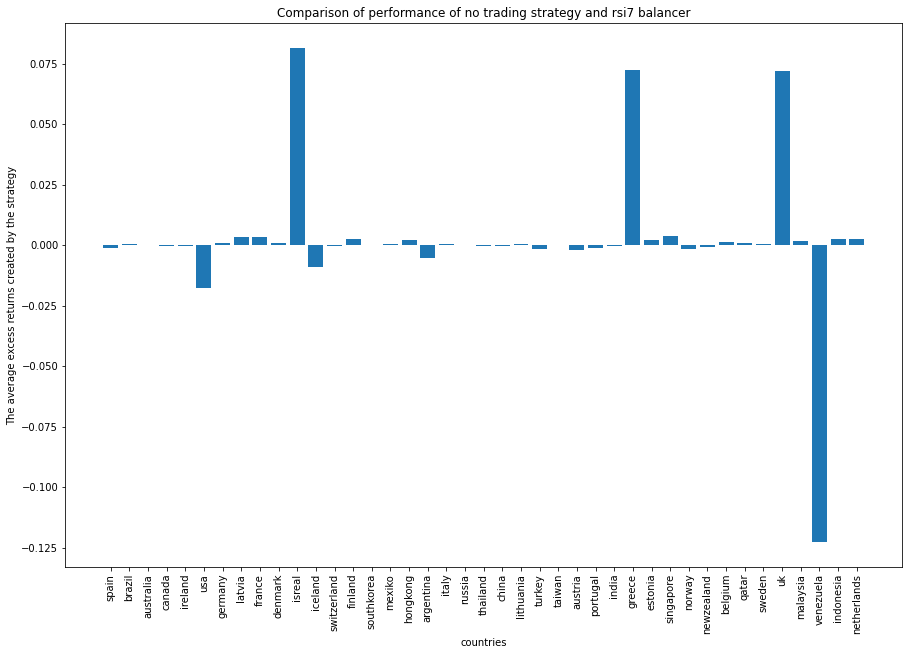

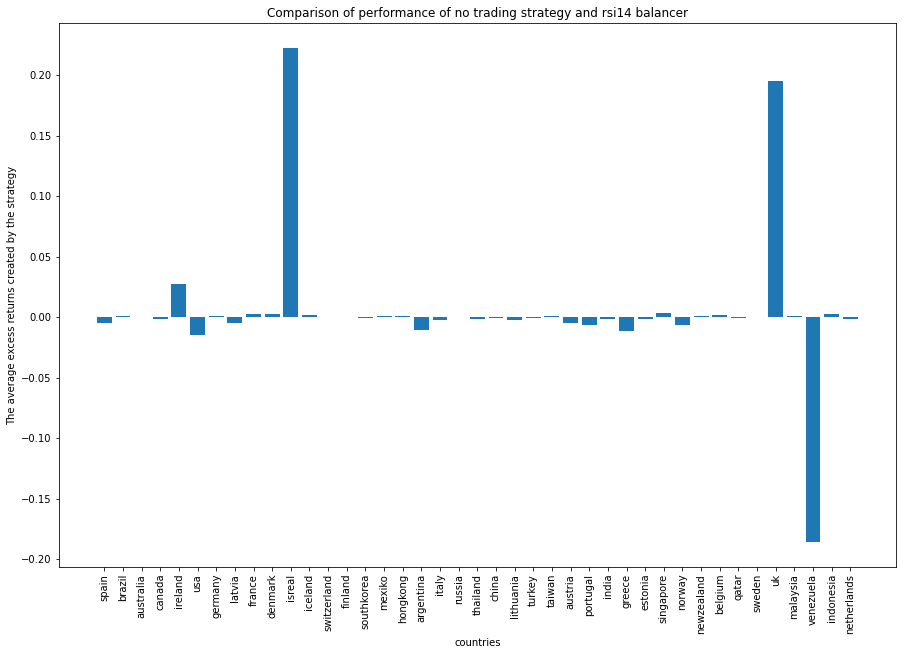

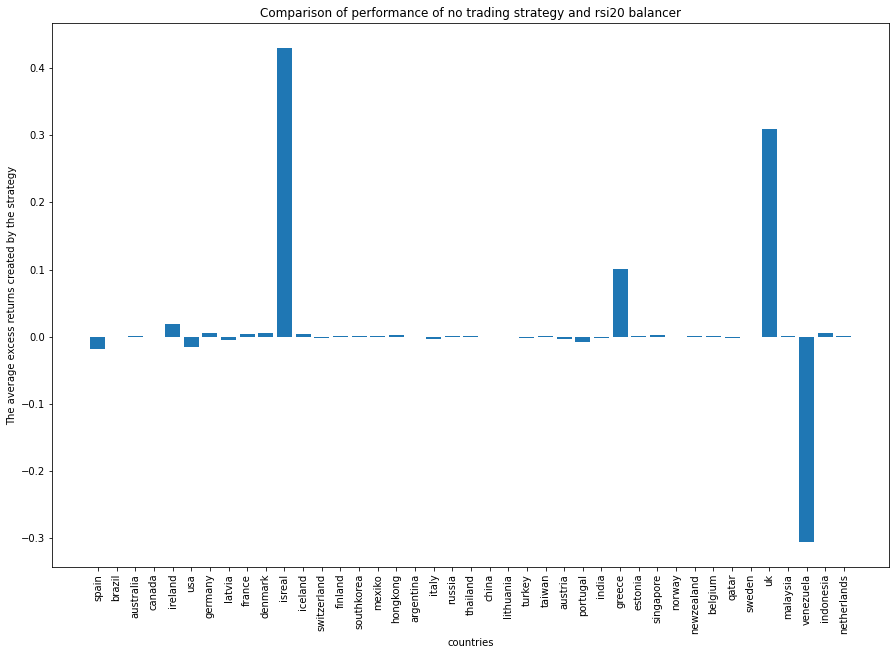

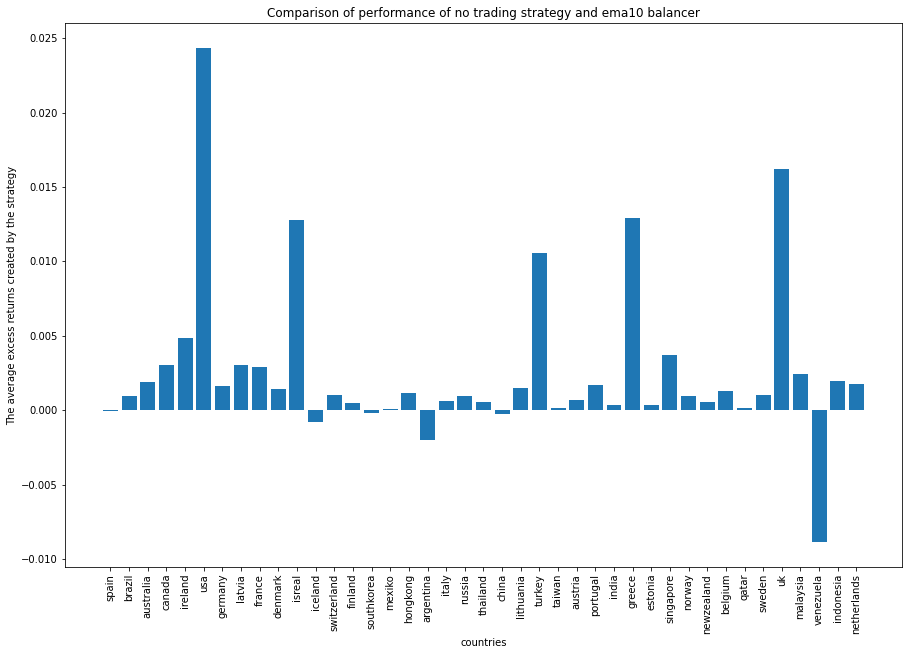

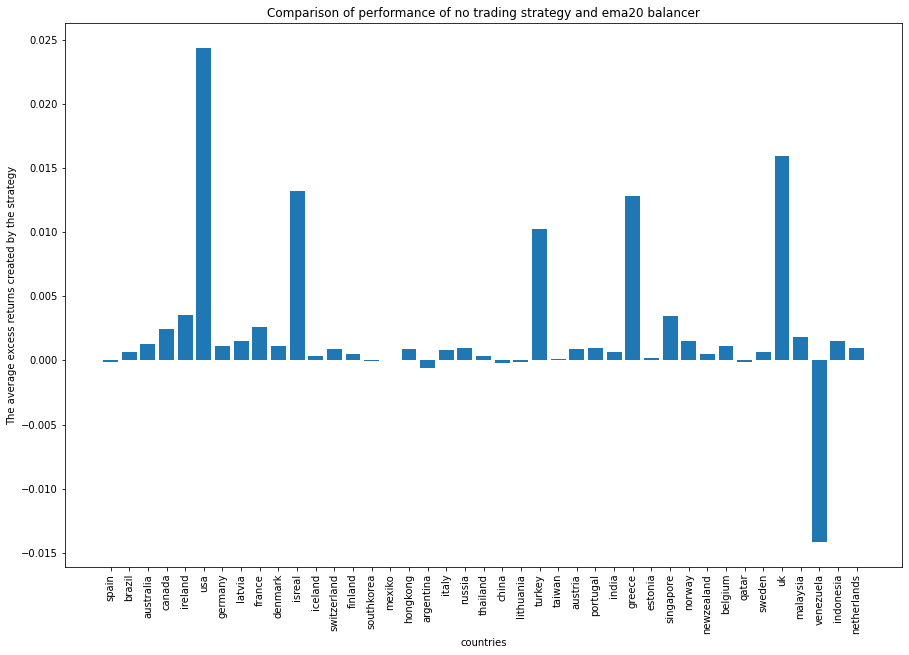

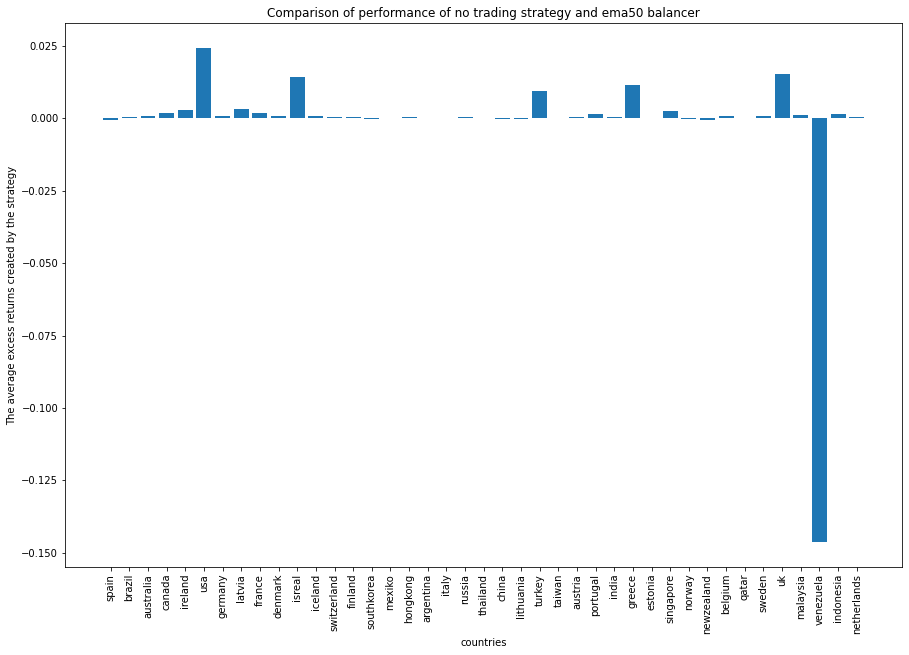

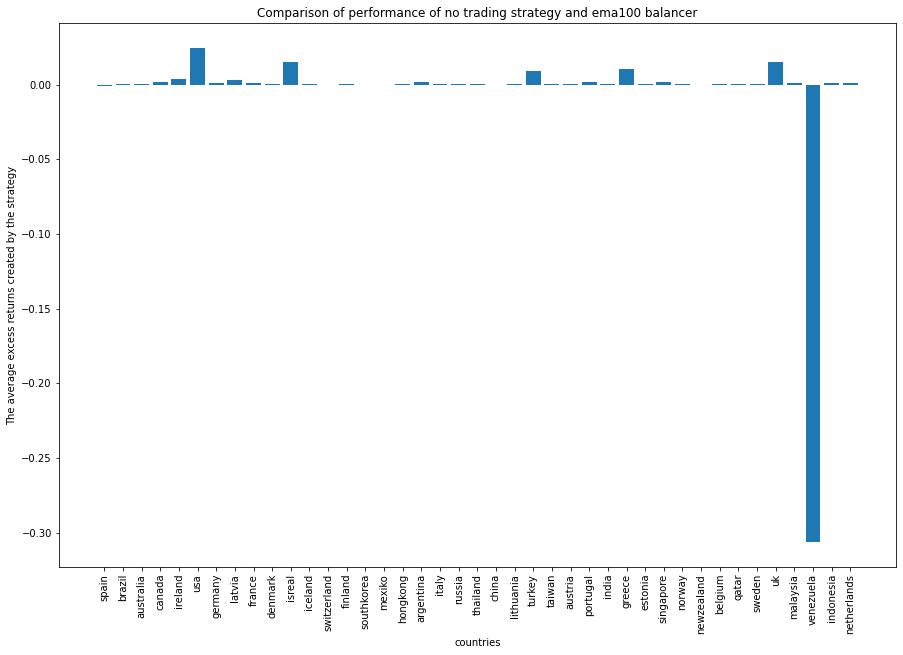

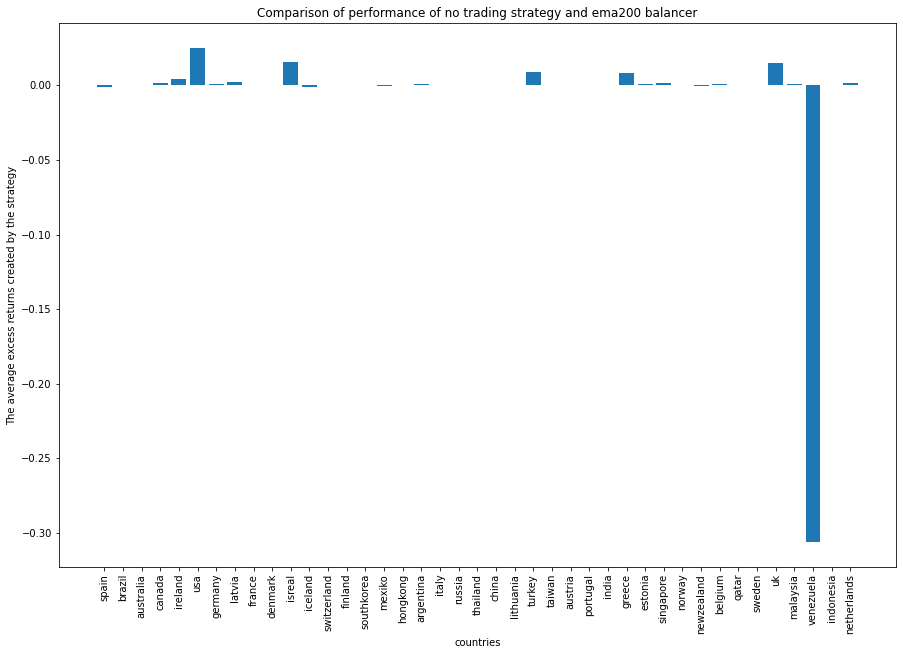

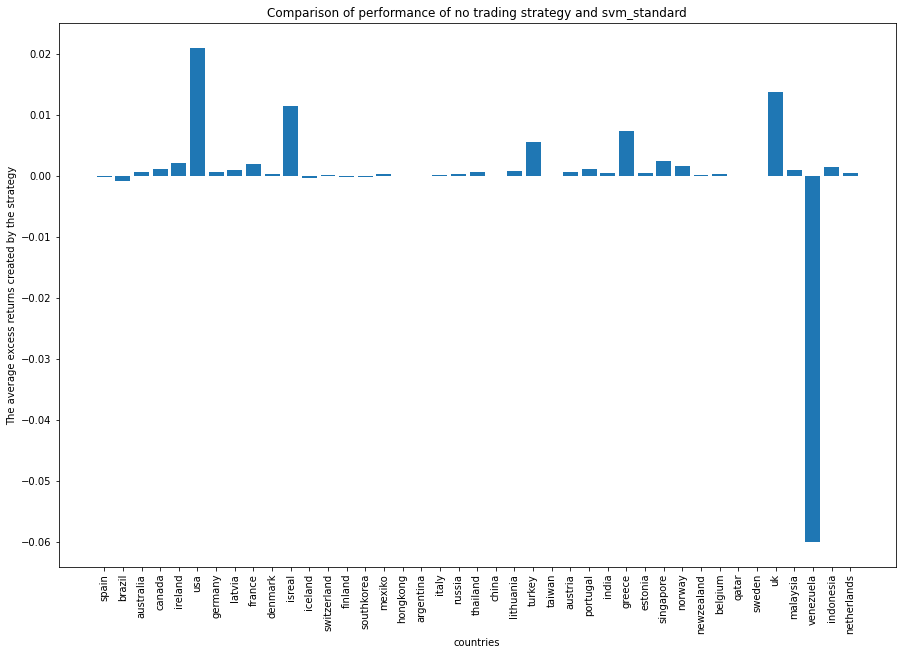

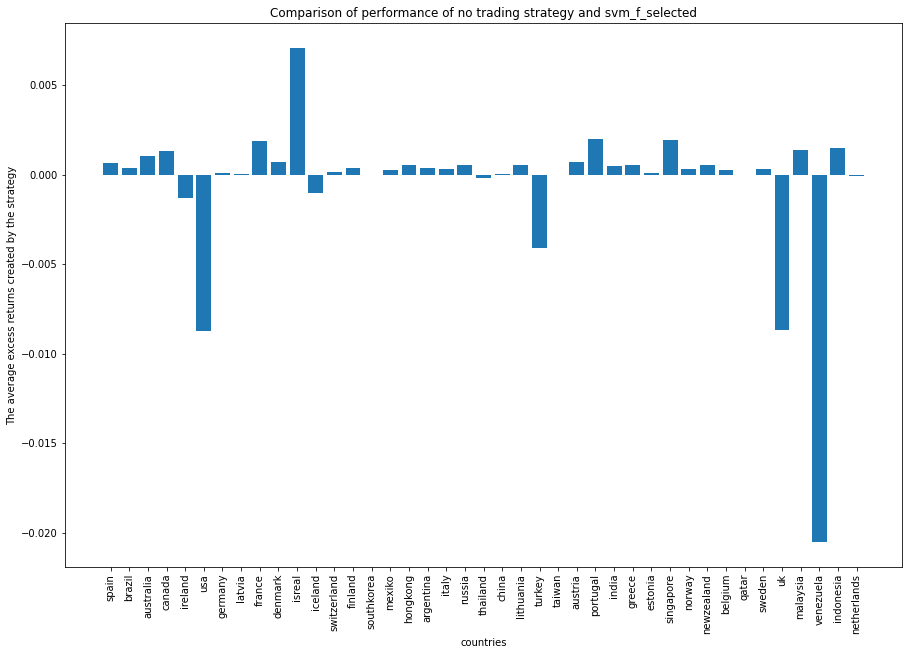

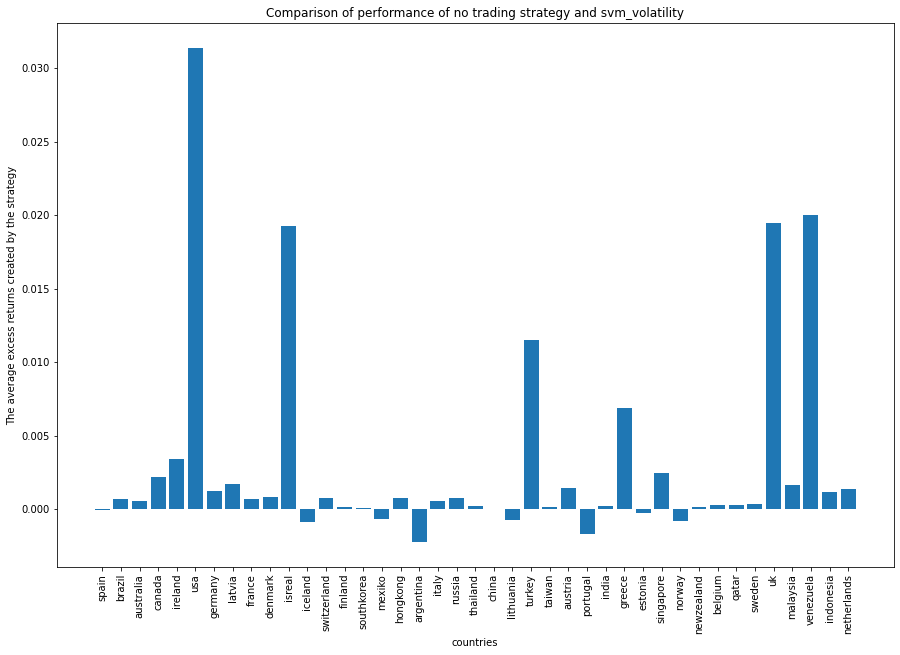

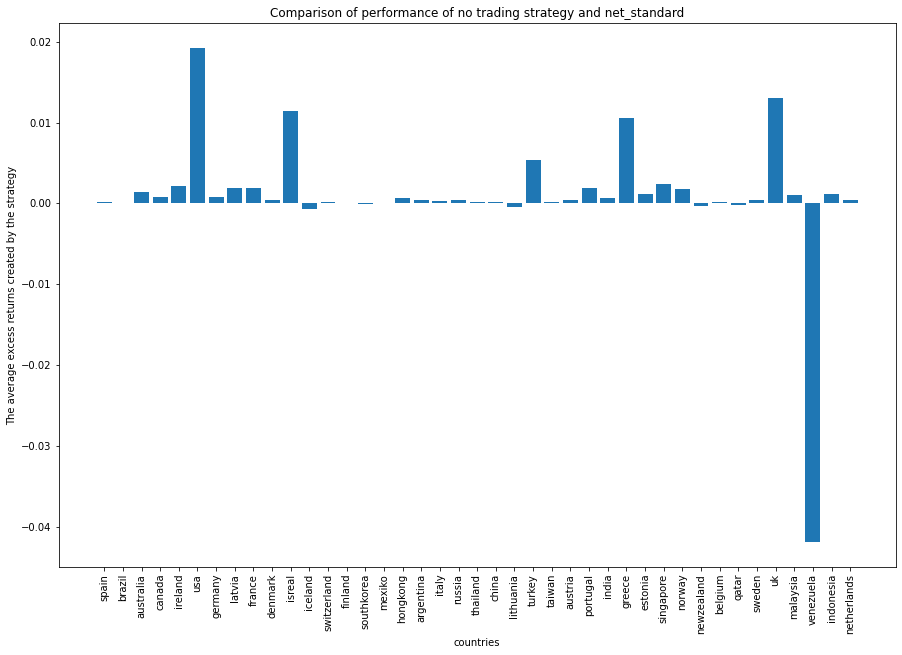

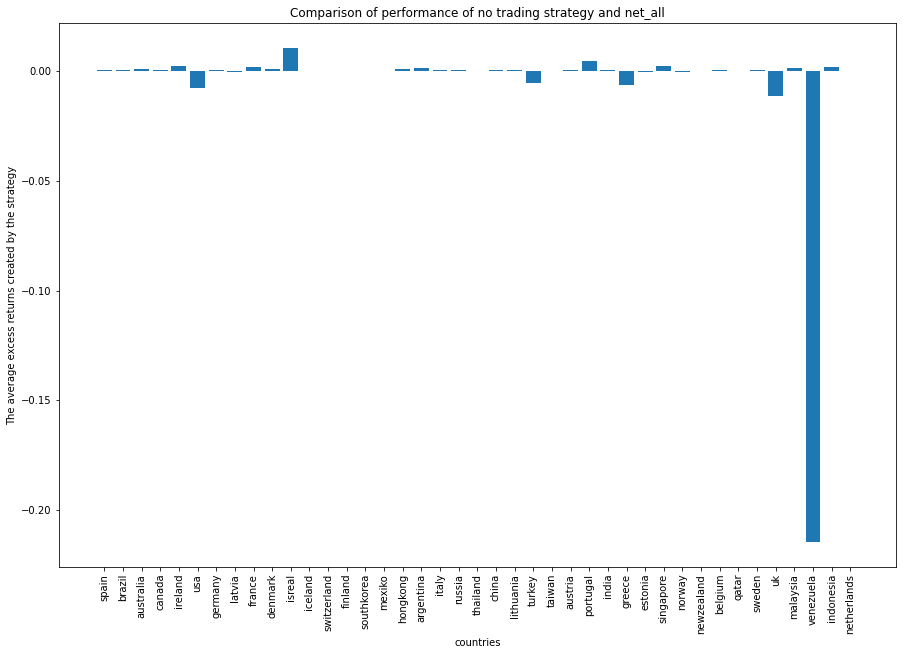

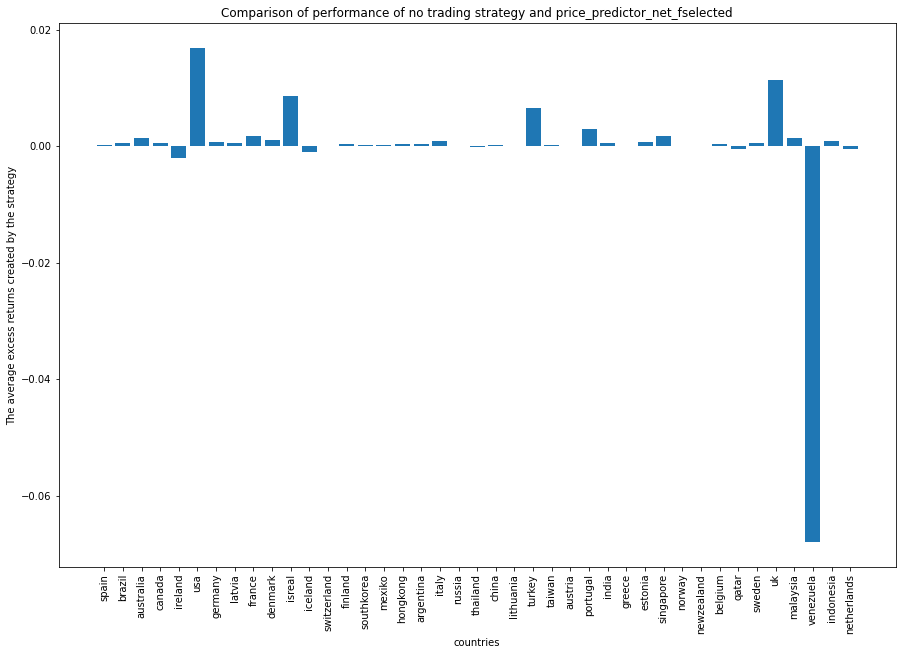

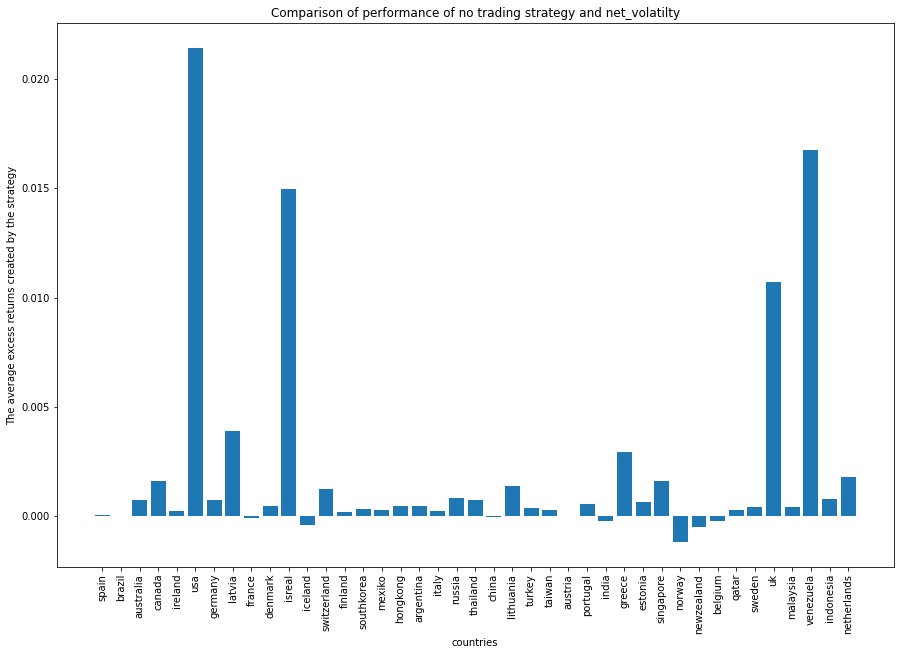

In [13]:
for strategy, rule in all_strategies.items():
    performance_bar_chart(calculate_performances(country_sets, rule), strategy)

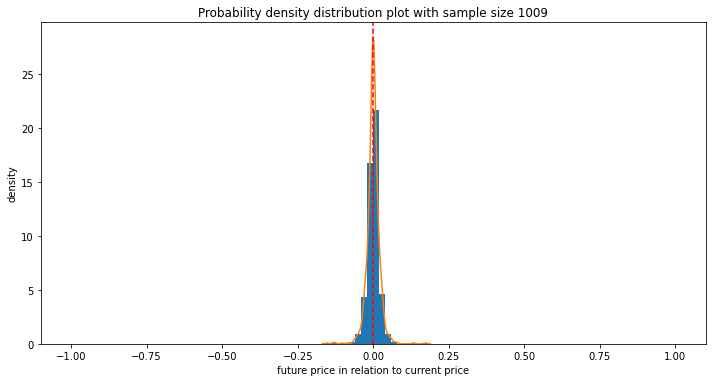

Original, active days: 1009, leverage: 1, log mean: -0.00010973172630662741, std: 0.021143751868931148


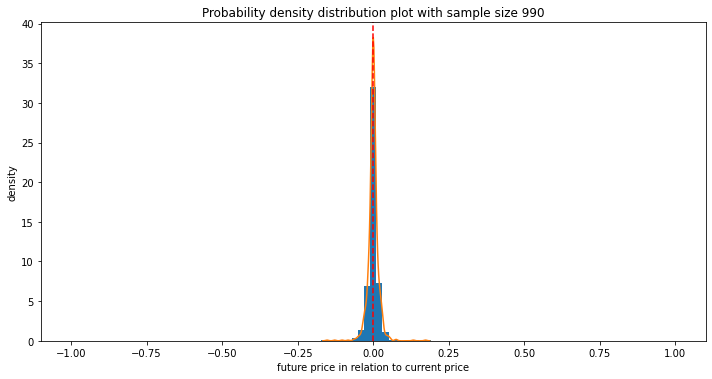

Trading, active days: 990, leverage: 0.7676035001366798, log mean: -5.3511641482601125e-05, std: 0.018284988923385644


In [45]:
plot_performances(*calculate_portfolio_performance(country_sets["austria"], regulating_speculator_strategies["bollinger speculator"]))